In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("Telco_customer_churn_adapted_v2.xlsx")
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [3]:
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

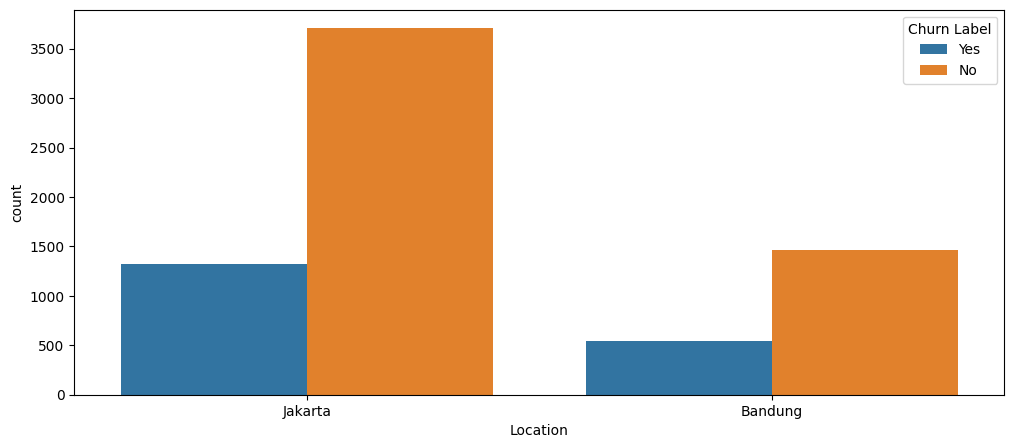

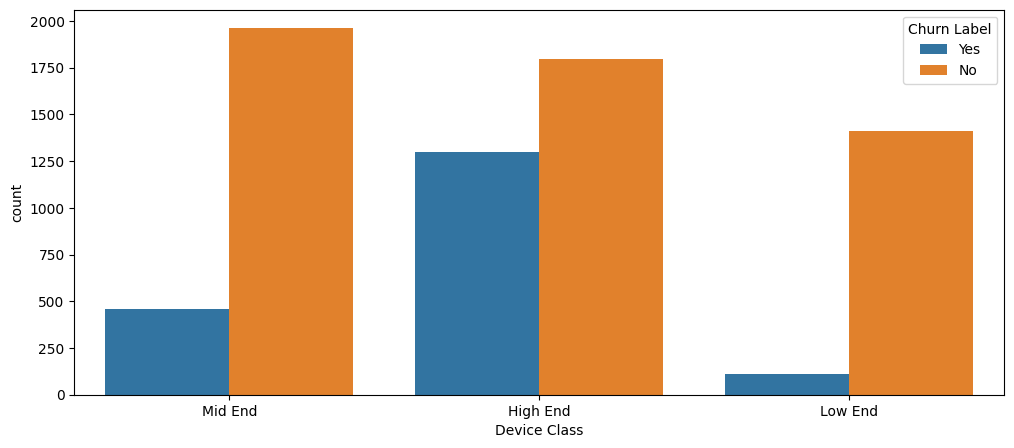

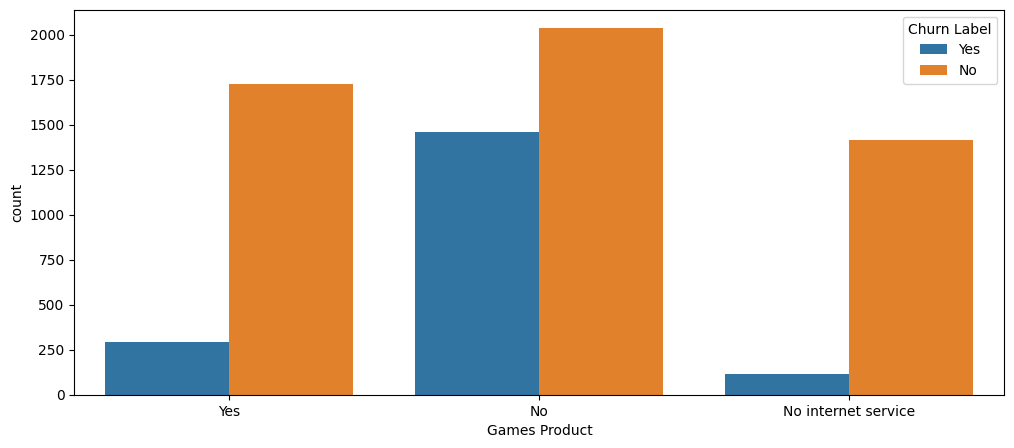

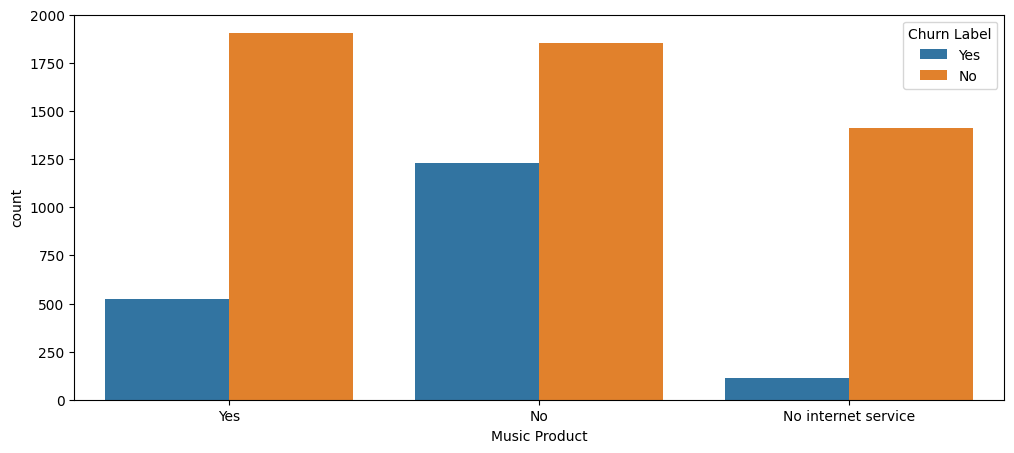

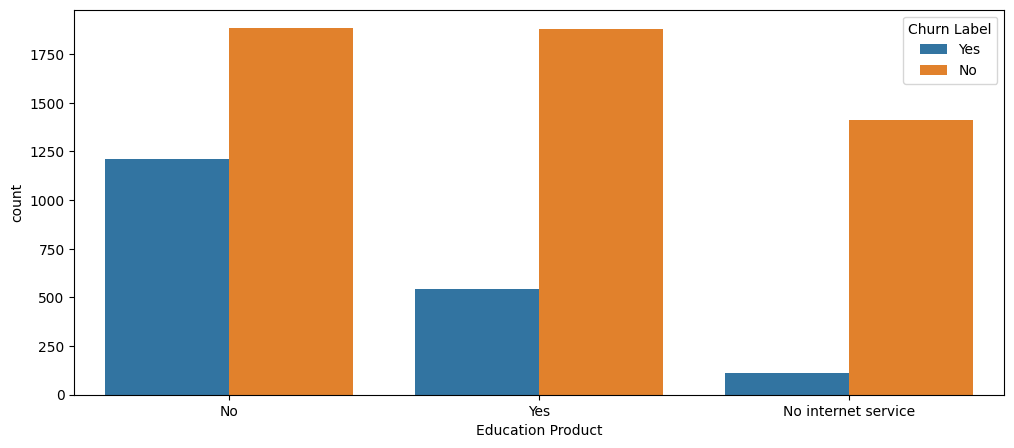

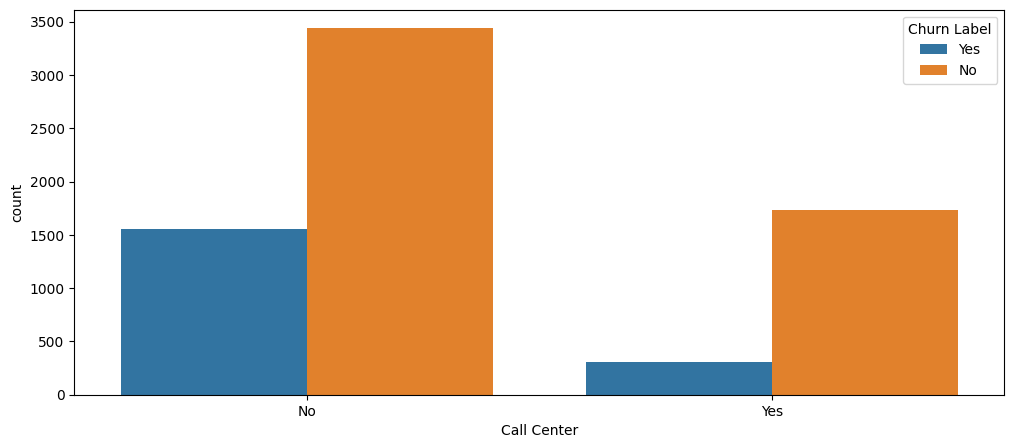

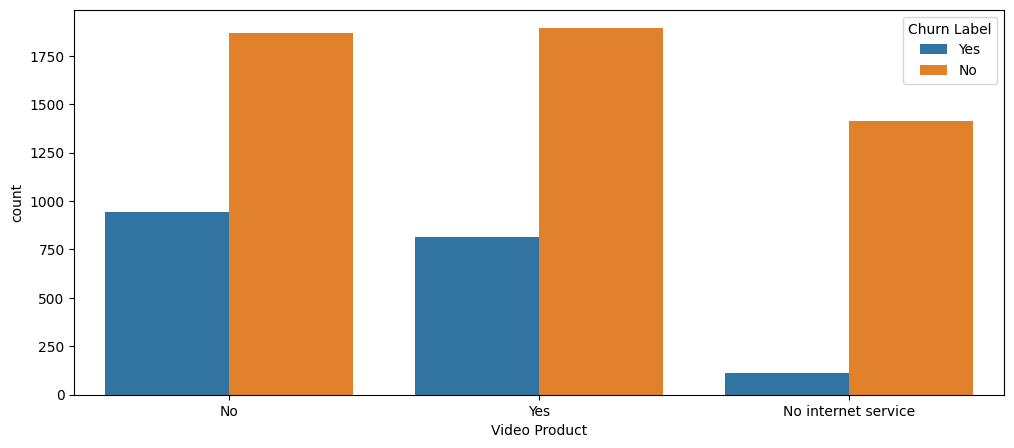

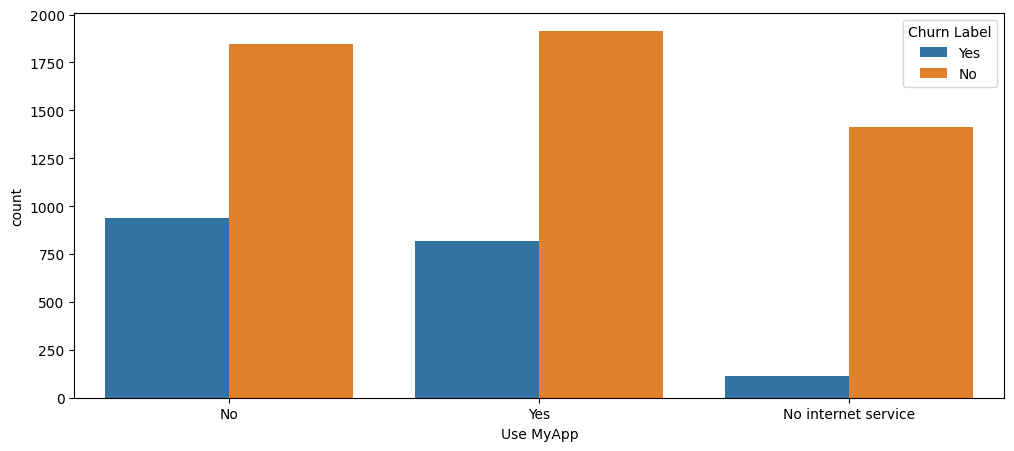

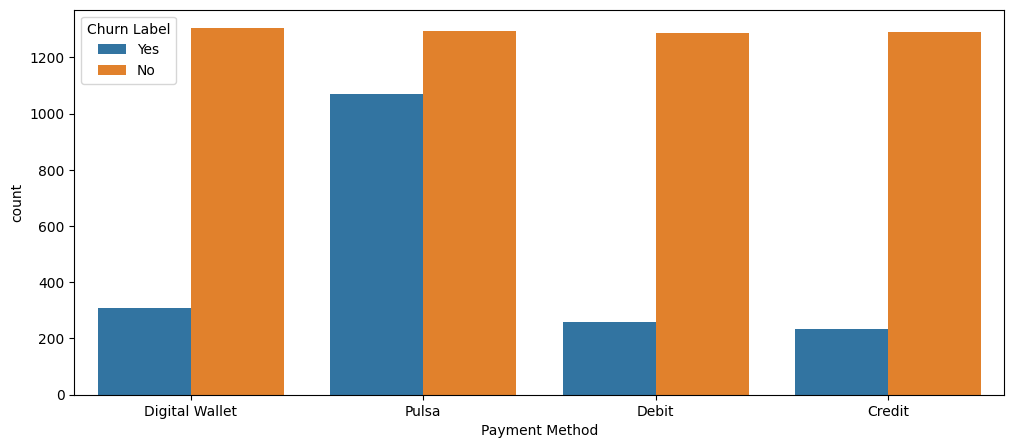

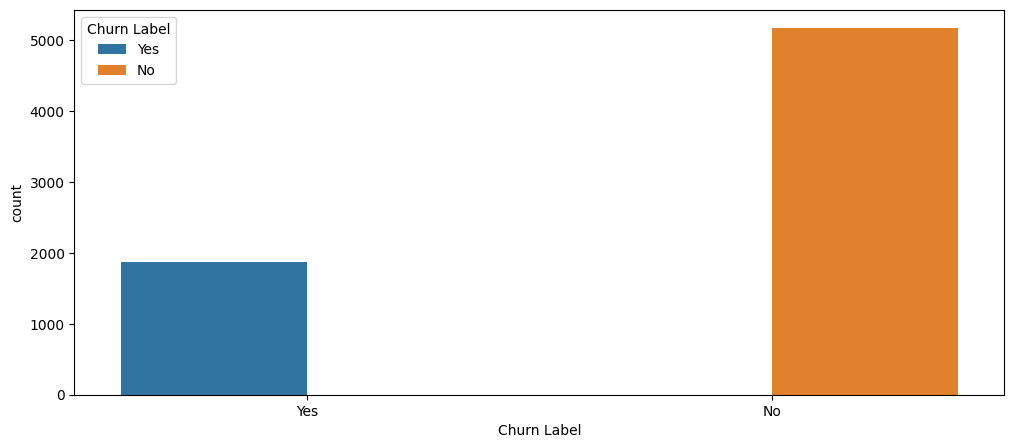

In [116]:
# plot cat features vs target
for i in df.columns:
    if df[i].dtype == 'object':
        plt.figure(figsize=(12,5))
        sns.countplot(x=i, hue='Churn Label', data=df)
        plt.xlabel(i)
        plt.show()

<h3> First time analysis Categorical Features with Target</h3>

* Customer who lives in Jakarta have a tendency to churn than customer who lives in Bandung
* Customer who using High End Device have a highest possibility to churn than another customer with mid or low end device. 
* Customer who not uses internet service for game product have a highest possibility to churn than another customer. From this information, we suppose : 
    * the internet service have a good performance for customer who like playing game.
* Customer who not uses internet service for music product have a highest possibility to churn than another customer.
* Customer who not uses internet service for education product have a highest possibility to churn than another
* Customer who not uses call center service have a tendency to churn than customer who use call center service. From this information, we suppose :
    * The customer doesn't know how to uses call center service, this indicate they are churn
    * The call center service itself cannot help customer solve their problem, this indicate some customers who uses call center still churn    
* Both customer who uses and not uses video product have a tendency to churn
* Both customer who uses and not uses myApp service have a tendency to churn
* Customer who use pulsa as payment method have a highest possibility to churn than another customer. We suppose :
    * The customer encounter loss their pulsa when the internet services is on (normal situation)




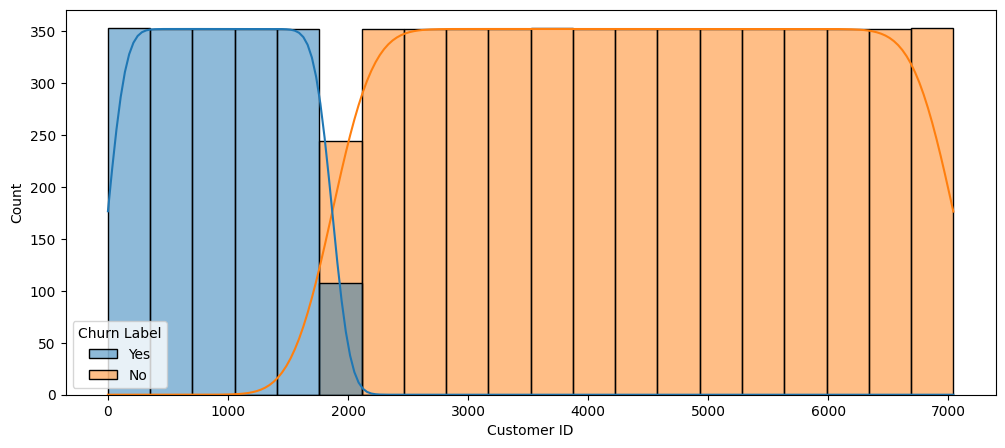

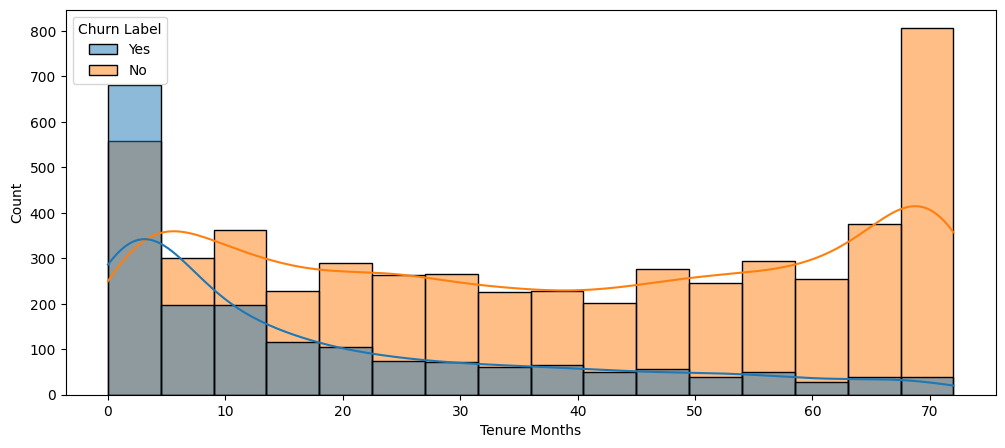

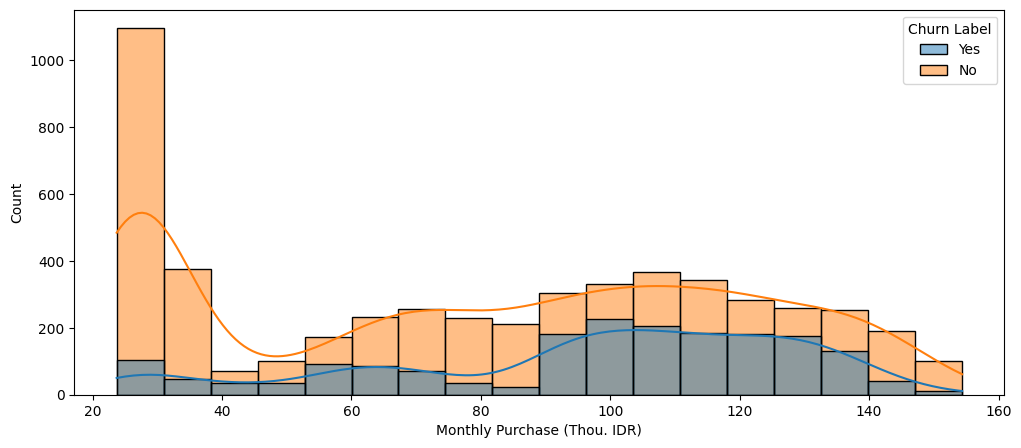

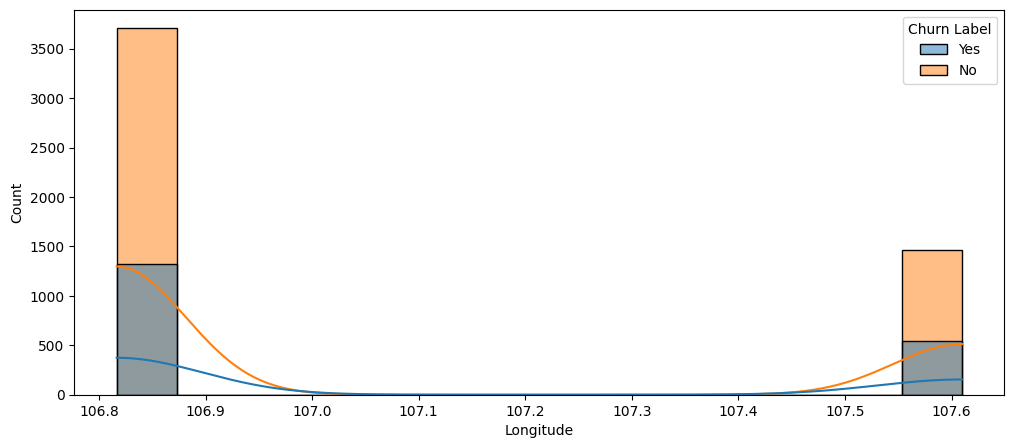

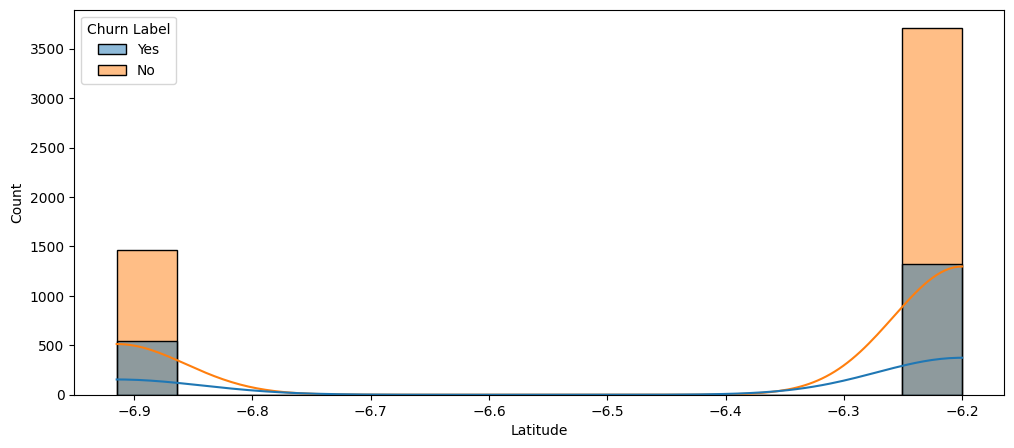

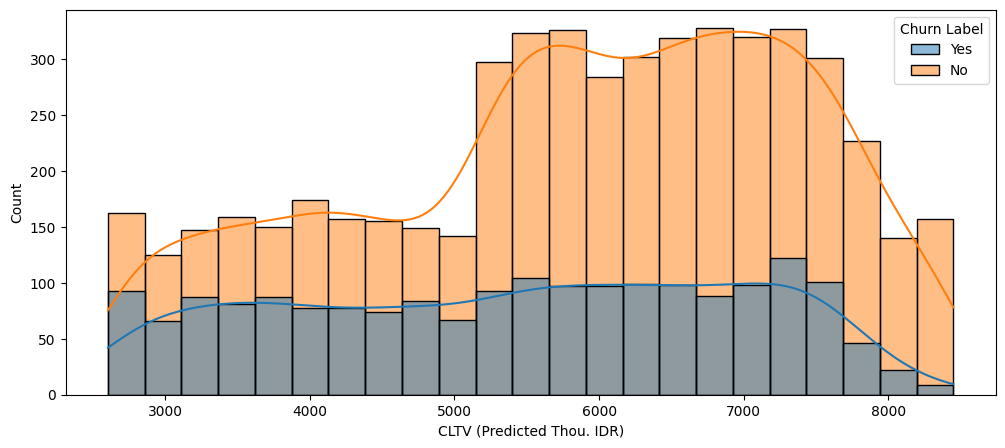

In [27]:
# plot numerical features vs target
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(12,5))
        sns.histplot(x=i, hue='Churn Label', data=df, kde=True)
        plt.xlabel(i)
        plt.show()

<h3> First time numerical feature with target </h3>

* Among the customers in the dataset, 26.5% of customers are in churn and have stopped using the company's services
* Geography of the customers according to longitude and latitude just represent two city not every district in the city.
* 50% of the customers who left the service did so in the first 10 months. The number of clients in the churn ceases to decline sharply after 5 months in the service.
* The client's lifetime before the churn is very important information, Usually the first months in the service are the most risky, since customers may have their own expectations from the service and so on

Let's deep dive explore the data.

In [76]:
df.groupby('Churn Label')['Customer ID'].nunique()
 

Churn Label
No     5174
Yes    1869
Name: Customer ID, dtype: int64

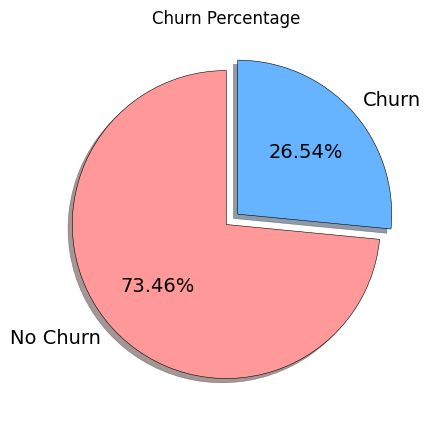

In [75]:
plt.figure(figsize=(5,5))
plt.pie(df.groupby('Churn Label')['Customer ID'].nunique(), 
        labels=['No Churn', 'Churn'], 
        autopct='%.2f%%', 
        explode=[0,0.1], 
        shadow=True,
        startangle=90, 
        textprops={'fontsize': 14},
        colors=['#ff9999','#66b3ff'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.4}
        )
plt.title('Churn Percentage')
plt.show()



Customer's lifetime in the service

In [104]:
df.groupby('Churn Label')['Tenure Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn Label,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Well, we know that in general 26.5% of customers have stopped using our service and 50% of such customers have used our service for 10 months or less.

<h3> Analysis from Feature with feature </h3>
ASAP